In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Import a CSV file
import pandas as pd

In [2]:
musicEmotion = pd.read_csv("Data/data.csv")
musicEmotion = musicEmotion.groupby('track id')

In [3]:
musicEmotionAvgs = []
for i in range(1,len(musicEmotion)+1): #Arrays grouped by track ID 1-400(inclusive)
    count = 0
    song = np.zeros(9) #Array to hold avg of each emotion for given song
    musicEmotionOne = musicEmotion.get_group(i) #Get each group loop
    musicEmotionOne = np.asmatrix(musicEmotionOne) 
    for j in range(2,11): #Avg each of the 9 emotions columms C through K from each grouping
        song[count] = np.sum(musicEmotionOne[:,j:j+1]) / len(musicEmotionOne) #Avg for each emotion
        count += 1 #Keeps track current place in the song array
    musicEmotionAvgs.append(song)

musicEmotionAvgs = np.asarray(musicEmotionAvgs) #Coverts Matrix to an array


In [4]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example. 
        That is, we have m examples each of n dimensions.
        
    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.
    
    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the 
    range 0..K-1

    Note
    ----
    You can use a for-loop over the examples to compute this.
    """
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    # ====================== YOUR CODE HERE ======================

    for i in np.arange(idx.size):
        
        J = np.sqrt(np.sum(np.square(X[i] - centroids), axis = 1))
            
        idx[i] = np.argmin(J)
    
    # =============================================================
    return idx

In [5]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it 
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.
    
    K : int
        Number of clusters
    
    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data 
        points assigned to it.
    
    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================

    for i in np.arange(K):
        centroids[i] = np.mean(X[idx == i], axis = 0)
        
    
    # =============================================================
    return centroids

In [6]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like 
        The dataset of size (m x n).
    
    K : int
        The number of clusters.
    
    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).
    
    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    m, n = X.shape
    
    # You should return this values correctly
    centroids = np.zeros((K, n))

    # ====================== YOUR CODE HERE ======================

    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K], :]
    
    # =============================================================
    return centroids

In [7]:
centroids = kMeansInitCentroids(musicEmotionAvgs, 9)
print("Printig Nine Initial Centroid Values: ")
print(centroids)

Printig Nine Initial Centroid Values: 
[[0.11764706 0.41176471 0.17647059 0.35294118 0.52941176 0.
  0.11764706 0.05882353 0.11764706]
 [0.35714286 0.42857143 0.         0.07142857 0.14285714 0.42857143
  0.21428571 0.42857143 0.14285714]
 [0.16666667 0.33333333 0.         0.16666667 0.         0.33333333
  0.         0.5        0.58333333]
 [0.16666667 0.25       0.         0.08333333 0.         0.41666667
  0.5        0.08333333 0.        ]
 [0.17647059 0.29411765 0.05882353 0.17647059 0.23529412 0.17647059
  0.64705882 0.11764706 0.        ]
 [0.17647059 0.         0.11764706 0.23529412 0.         0.11764706
  0.76470588 0.29411765 0.        ]
 [0.         0.07142857 0.42857143 0.42857143 0.57142857 0.21428571
  0.21428571 0.07142857 0.21428571]
 [0.         0.16666667 0.41666667 0.58333333 0.5        0.
  0.         0.08333333 0.5       ]
 [0.         0.16666667 0.41666667 0.41666667 0.5        0.
  0.08333333 0.25       0.33333333]]


In [8]:
centroidsPrev, idxPrev = utils.runkMeans(musicEmotionAvgs, centroids, findClosestCentroids, computeCentroids, 1, True)
centroidsNew, idxNew = utils.runkMeans(musicEmotionAvgs, centroidsPrev, findClosestCentroids, computeCentroids, 1, True)

print("Running Centroid Values After Performing K Means until the centrioid do not change: ")

same = "false"
while (same == "false"):
    
    if(np.array_equal(centroidsPrev,centroidsNew)):
        same = "true"
        centroids = centroidsNew
    else:
        centroidsPrev, idxPrev = utils.runkMeans(musicEmotionAvgs, centroidsNew, findClosestCentroids, computeCentroids, 1, True)
        centroidsNew, idxNew = utils.runkMeans(musicEmotionAvgs, centroidsPrev , findClosestCentroids, computeCentroids, 2, True) 


    
print(centroids)

Running Centroid Values After Performing K Means until the centrioid do not change: 
[[0.13837227 0.38100521 0.14699039 0.22539197 0.49294536 0.11334803
  0.136848   0.21699884 0.17879413]
 [0.11286989 0.31088873 0.04419931 0.11891806 0.1173483  0.48495565
  0.13087986 0.46340999 0.18325539]
 [0.1068844  0.2810544  0.09897677 0.20726818 0.21486729 0.15434946
  0.06386868 0.3988512  0.3669356 ]
 [0.19648291 0.14534136 0.0342513  0.09035916 0.0602619  0.45913118
  0.58027401 0.25662912 0.04919787]
 [0.22033269 0.09692683 0.12816378 0.19887022 0.2164987  0.16656717
  0.61763297 0.15972019 0.05942983]
 [0.11669906 0.16522019 0.0349489  0.11351289 0.09851903 0.26397432
  0.42235786 0.48400239 0.08079324]
 [0.14948566 0.10381977 0.31411133 0.37150752 0.32395426 0.10953603
  0.26079948 0.13389686 0.1602817 ]
 [0.06311114 0.19076469 0.28691416 0.46729551 0.39297698 0.03716967
  0.05181613 0.1089979  0.4081885 ]
 [0.09862385 0.12771631 0.40486333 0.4065966  0.63385514 0.03505754
  0.0772574  0.

In [9]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is 
        the number of features.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we 
        mentioned in class.
    
    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix. 

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================

    Sigma = (1 / m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    
    # ============================================================
    return U, S

In [10]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    
    Instructions
    ------------
    Compute the projection of the data using only the top K 
    eigenvectors in U (first K columns). 
    For the i-th example X[i,:], the projection on to the k-th 
    eigenvector is given as follows:
    
        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================

    Z = np.dot(X,  U[:, :K])
    
    # =============================================================
    return Z

In [11]:
U,S = pca(musicEmotionAvgs)
z = projectData(musicEmotionAvgs, U, 2)
print("Performing PCA on Music Emotion Averages to Reduce Dimensionality")

Performing PCA on Music Emotion Averages to Reduce Dimensionality


In [12]:
U1,S1 = pca(centroids)
z1 = projectData(centroids, U1, 2)
print("Performing PCA on Centroids to Reduce Dimensionality")

Performing PCA on Centroids to Reduce Dimensionality


Centroids


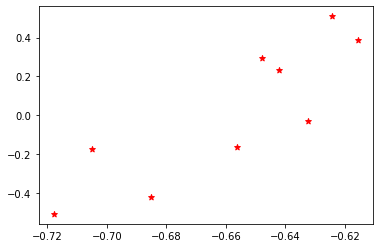

In [13]:
print("Centroids")
centroidPlot = pyplot.gca()
centroidPlot.scatter(z1[:,:1], z1[:,1:2], color = "red", marker= "*") # Centroids

Musical Emotion Cross Genre Similarities


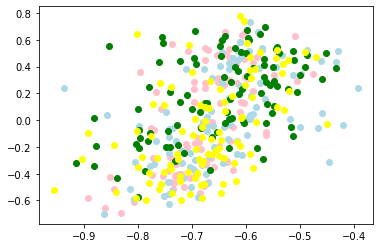

In [14]:
print("Musical Emotion Cross Genre Similarities")
init_plot = pyplot.gca()
init_plot.scatter(z[:101,:1], z[:101,1:2], color = "pink") # Classical
init_plot.scatter(z[101:201,:1], z[101:201,1:2], color = "lightblue") # Rock
init_plot.scatter(z[201:301,:1], z[201:301,1:2], color = "green") # Electronic
init_plot.scatter(z[301:401,:1], z[301:401,1:2], color = "yellow") # Pop

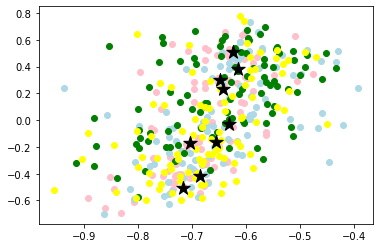

In [15]:

final_plot = pyplot.gca()
final_plot.scatter(z[:101,:1], z[:101,1:2], color = "pink") # Classical
final_plot.scatter(z[101:201,:1], z[101:201,1:2], color = "lightblue") # Rock
final_plot.scatter(z[201:301,:1], z[201:301,1:2], color = "green") # Electronic
final_plot.scatter(z[301:401,:1], z[301:401,1:2], color = "yellow") # Pop
final_plot.scatter(z1[:,:1], z1[:,1:2], color = "black", marker= "*", s = 200) # Centroids

In [16]:
print("Printing Songs with Most Similar Induced Emotions")

classical = z[:101,:]
rock = z[101:201,:]
electronic = z[201:301,:]
pop = z[301:401,:]
songArray = [classical,rock,electronic,pop]         

for n in range(3): # First array
    arr = songArray[n]
    
    for i in range(n+1,4): # arrays to compare
        arrTwo = songArray[i]
        for j in range(99): # compare each song of the first array
            song = arr[j]
            for m in range(99): # compare j song to all of second genre songs
                y = (song[0] - arrTwo[m][0])**2 
                x = (song[1] - arrTwo[m][1])**2 
                num = np.sqrt((y+x))
                if(abs(num) < 0.01):
                    print("Songs with Similar Induced Emotions: ")
                    print(" Genre: ", n, "J: ", j)
                    print(" Genre: ", i, "J: ", m)

Printing Songs with Most Similar Induced Emotions
Songs with Similar Induced Emotions: 
 Genre:  0 J:  1
 Genre:  1 J:  43
Songs with Similar Induced Emotions: 
 Genre:  0 J:  7
 Genre:  1 J:  70
Songs with Similar Induced Emotions: 
 Genre:  0 J:  23
 Genre:  1 J:  42
Songs with Similar Induced Emotions: 
 Genre:  0 J:  23
 Genre:  1 J:  60
Songs with Similar Induced Emotions: 
 Genre:  0 J:  28
 Genre:  1 J:  82
Songs with Similar Induced Emotions: 
 Genre:  0 J:  31
 Genre:  1 J:  0
Songs with Similar Induced Emotions: 
 Genre:  0 J:  47
 Genre:  1 J:  52
Songs with Similar Induced Emotions: 
 Genre:  0 J:  55
 Genre:  1 J:  4
Songs with Similar Induced Emotions: 
 Genre:  0 J:  97
 Genre:  1 J:  31
Songs with Similar Induced Emotions: 
 Genre:  0 J:  11
 Genre:  2 J:  10
Songs with Similar Induced Emotions: 
 Genre:  0 J:  47
 Genre:  2 J:  6
Songs with Similar Induced Emotions: 
 Genre:  0 J:  8
 Genre:  3 J:  50
Songs with Similar Induced Emotions: 
 Genre:  0 J:  10
 Genre:  3 J